In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
model_path = "/content/drive/MyDrive/fingml/best_model_CNN_BN.keras"
model = keras.models.load_model(model_path)

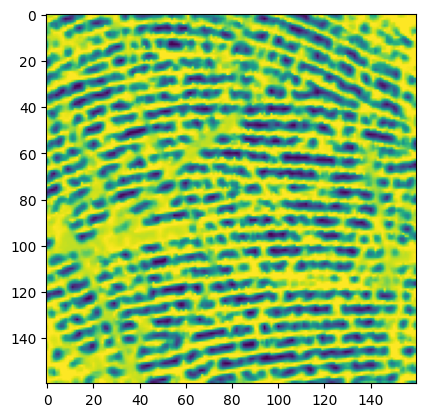

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/testing/200.bmp', cv2.IMREAD_GRAYSCALE)


plt.imshow(img1)
plt.show()

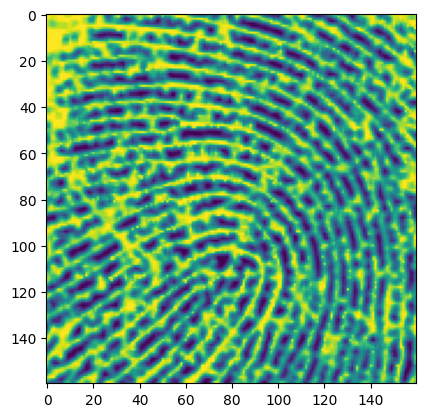

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/testing/100.bmp', cv2.IMREAD_GRAYSCALE)

plt.imshow(img2)
plt.show()

In [ ]:
img1 = cv2.resize(img1, (256, 256))
img1 = np.expand_dims(img1, axis=-1)
img2 = cv2.resize(img2, (256, 256))
img2 = np.expand_dims(img2, axis=-1)

In [ ]:
pred1 = model.predict(np.array([img1]))
pred2 = model.predict(np.array([img2]))
model.summary()
if np.argmax(pred1) == np.argmax(pred2):
    print("The two fingerprints match!")
else:
    print("The two fingerprints do not match.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,588,620 (112.87 MB)

 Trainable params: 29,587,658 (112.87 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

The two fingerprints do not match.


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# Directory to store registered fingerprints
FINGERPRINT_DIR = '/content/drive/MyDrive/Finger/Fingerprints/'

if not os.path.exists(FINGERPRINT_DIR):
    os.makedirs(FINGERPRINT_DIR)

def preprocess_image(image):
    image = cv2.resize(image, (256, 256))  # Resize to the model's expected input size
    image = np.expand_dims(image, axis=-1)  # Add a channel dimension
    return image

def fingerprint_matching(fingerprint_image1, fingerprint_image2):
    model_path = "/content/drive/MyDrive/fingml/best_model_CNN_BN.keras"
    model = keras.models.load_model(model_path)

    pred1 = model.predict(np.array([fingerprint_image1]))
    pred2 = model.predict(np.array([fingerprint_image2]))

    if np.argmax(pred1) == np.argmax(pred2):
        return True
    else:
        return False

def register_fingerprint(user_id, fingerprint_image):
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bmp')
    cv2.imwrite(fingerprint_file_path, fingerprint_image)
    print(f'Fingerprint registered for user ID: {user_id}')

def authenticate_fingerprint(user_id, fingerprint_image):
    stored_fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bmp')

    if not os.path.exists(stored_fingerprint_file_path):
        print(f'No fingerprint registered for user ID: {user_id}')
        return

    # Load stored fingerprint image
    stored_fingerprint_image = cv2.imread(stored_fingerprint_file_path, cv2.IMREAD_GRAYSCALE)

    # Preprocess both images
    stored_fingerprint_image = preprocess_image(stored_fingerprint_image)
    fingerprint_image = preprocess_image(fingerprint_image)

    # Check if fingerprints match using the ML model
    match = fingerprint_matching(stored_fingerprint_image, fingerprint_image)

    if match:
        print('Fingerprint authenticated successfully!')
    else:
        print('Authentication failed. Fingerprint does not match.')

# Example usage
user_id = input('Enter user ID for registration: ')
fingerprint_image = cv2.imread('/content/drive/MyDrive/testing/300.bmp', cv2.IMREAD_GRAYSCALE)
register_fingerprint(user_id, fingerprint_image)

user_id = input('Enter user ID for authentication: ')
fingerprint_image = cv2.imread('/content/drive/MyDrive/testing/300.bmp', cv2.IMREAD_GRAYSCALE)
authenticate_fingerprint(user_id, fingerprint_image)


Enter user ID for registration: 500
Fingerprint registered for user ID: 500
Enter user ID for authentication: 500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Fingerprint authenticated successfully!


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Directory to store registered fingerprints
FINGERPRINT_DIR = '/content/drive/MyDrive/Finger/Fingerprints/'

if not os.path.exists(FINGERPRINT_DIR):
    os.makedirs(FINGERPRINT_DIR)

def preprocess_image(image):
    image = cv2.resize(image, (256, 256))  # Resize to the model's input size
    image = np.expand_dims(image, axis=-1)  # Add a channel dimension
    return image

def fingerprint_matching(fingerprint_image1, fingerprint_image2):
    model_path = "/content/drive/MyDrive/fingml/best_model_CNN_BN.keras"
    model = keras.models.load_model(model_path)

    pred1 = model.predict(np.array([fingerprint_image1]))
    pred2 = model.predict(np.array([fingerprint_image2]))

    if np.argmax(pred1) == np.argmax(pred2):
        return True
    else:
        return False

def register_fingerprint(user_id, fingerprint_image):
    user_id = user_id.strip().lower()  # Normalize the user ID
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bmp')

    if os.path.exists(fingerprint_file_path):
        print(f'User ID {user_id} already exists. Registration failed.')
        return

    # Save the fingerprint image
    cv2.imwrite(fingerprint_file_path, fingerprint_image)
    print(f'Fingerprint registered for user ID: {user_id}')

def authenticate_fingerprint(user_id, fingerprint_image):
    user_id = user_id.strip().lower()  # Normalize the user ID
    stored_fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bmp')

    if not os.path.exists(stored_fingerprint_file_path):
        print(f'No fingerprint registered for user ID: {user_id}')
        return

    # Load stored fingerprint image
    stored_fingerprint_image = cv2.imread(stored_fingerprint_file_path, cv2.IMREAD_GRAYSCALE)

    # Preprocess both images
    stored_fingerprint_image = preprocess_image(stored_fingerprint_image)
    fingerprint_image = preprocess_image(fingerprint_image)

    # Check if fingerprints match using the ML model
    match = fingerprint_matching(stored_fingerprint_image, fingerprint_image)

    if match:
        print('Fingerprint authenticated successfully!')
    else:
        print('Authentication failed. Fingerprint does not match.')

#  input validation
def get_valid_user_id(prompt):
    while True:
        user_id = input(prompt).strip()
        if not user_id:
            print("User ID cannot be empty. Please enter a valid user ID.")
        elif any(char in '<>:"/\\|?*' for char in user_id):  # Avoid invalid characters for file paths
            print("User ID contains invalid characters. Please avoid < > : \" / \\ | ? *.")
        else:
            return user_id

# Register a fingerprint
user_id = get_valid_user_id('Enter user ID for registration: ')
fingerprint_image = cv2.imread('/content/drive/MyDrive/testing/300.bmp', cv2.IMREAD_GRAYSCALE)
register_fingerprint(user_id, fingerprint_image)

# Authenticate a fingerprint
user_id = get_valid_user_id('Enter user ID for authentication: ')
fingerprint_image = cv2.imread('/content/drive/MyDrive/testing/200.bmp', cv2.IMREAD_GRAYSCALE)
authenticate_fingerprint(user_id, fingerprint_image)


Enter user ID for registration: 100
User ID 100 already exists. Registration failed.
Enter user ID for authentication: 100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Authentication failed. Fingerprint does not match.


In [ ]:
from PIL import Image
import io

# Function to convert an image to bytecode in BMP format
def image_to_bmp_bytecode(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Create a BytesIO object
        byte_array = io.BytesIO()
        # Save the image to the BytesIO object in BMP format
        img.save(byte_array, format='BMP')
        # Get the byte data from the BytesIO object
        byte_data = byte_array.getvalue()
    return byte_data

# Function to convert BMP bytecode back to an image
def bmp_bytecode_to_image(byte_data):
    # Use BytesIO to read the byte data
    byte_array = io.BytesIO(byte_data)
    # Open the image from the BytesIO object
    img = Image.open(byte_array)
    return img

# Convert image to BMP bytecode
image_path = '/content/drive/MyDrive/testing/300.bmp'
bmp_bytecode = image_to_bmp_bytecode(image_path)

# Save bytecode to a file
with open('image_bmp_bytecode.bin', 'wb') as byte_file:
    byte_file.write(bmp_bytecode)

# Convert BMP bytecode back to an image
reconstructed_image = bmp_bytecode_to_image(bmp_bytecode)

# Save the reconstructed image in BMP format to verify
reconstructed_image_path = 'reconstructed_image.bmp'
reconstructed_image.save(reconstructed_image_path, format='BMP')

# Display the reconstructed image
reconstructed_image.show()


# **Final program**

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import io
from PIL import Image

# Directory to store registered fingerprints as bytecode
FINGERPRINT_DIR = '/content/drive/MyDrive/Finger/Fingerprints/'

if not os.path.exists(FINGERPRINT_DIR):
    os.makedirs(FINGERPRINT_DIR)

def preprocess_image(image):
    image = cv2.resize(image, (256, 256))  # Resize to the model's expected input size
    image = np.expand_dims(image, axis=-1)  # Add a channel dimension
    return image

def fingerprint_matching(fingerprint_image1, fingerprint_image2):
    model_path = "/content/drive/MyDrive/fingml/best_model_CNN_BN.keras"
    model = keras.models.load_model(model_path)


    pred1 = model.predict(np.array([fingerprint_image1]))
    pred2 = model.predict(np.array([fingerprint_image2]))

    return np.argmax(pred1) == np.argmax(pred2)

def image_to_bmp_bytecode(image):
    byte_array = io.BytesIO()
    image_pil = Image.fromarray(image.squeeze(), mode='L')  # Convert to PIL Image in grayscale mode
    image_pil.save(byte_array, format='BMP')
    byte_data = byte_array.getvalue()
    return byte_data

def bmp_bytecode_to_image(byte_data):
    byte_array = io.BytesIO(byte_data)
    image_pil = Image.open(byte_array)
    image_np = np.array(image_pil)
    image_np = np.expand_dims(image_np, axis=-1)  # Add the channel dimension back
    return image_np

def register_fingerprint(user_id, fingerprint_image):
    user_id = user_id.strip().lower()  # Normalize the user ID
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bin')

    if os.path.exists(fingerprint_file_path):
        print(f'User ID {user_id} already exists. Registration failed.')
        return

    # Convert image to BMP bytecode
    fingerprint_bytecode = image_to_bmp_bytecode(fingerprint_image)

    # Save the bytecode to a file
    with open(fingerprint_file_path, 'wb') as file:
        file.write(fingerprint_bytecode)

    print(f'Fingerprint registered for user ID: {user_id}')

def authenticate_fingerprint(user_id, fingerprint_image):

    user_id = user_id.strip().lower()  # Normalize the user ID
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bin')

    if not os.path.exists(fingerprint_file_path):
        print(f'No fingerprint registered for user ID: {user_id}')
        return

    # Load the stored bytecode and convert it back to an image
    with open(fingerprint_file_path, 'rb') as file:
        stored_fingerprint_bytecode = file.read()

    stored_fingerprint_image = bmp_bytecode_to_image(stored_fingerprint_bytecode)

    # Preprocess both images
    stored_fingerprint_image = preprocess_image(stored_fingerprint_image)
    fingerprint_image = preprocess_image(fingerprint_image)

    # Check if fingerprints match using the ML model
    match = fingerprint_matching(stored_fingerprint_image, fingerprint_image)

    if match:
        print('Fingerprint authenticated successfully!')
    else:
        print('Authentication failed. Fingerprint does not match.')

# input validation
def get_valid_user_id(prompt):
    while True:
        user_id = input(prompt).strip()
        if not user_id:
            print("User ID cannot be empty. Please enter a valid user ID.")
        elif any(char in '<>:"/\\|?*' for char in user_id):  # Avoid invalid characters for file paths
            print("User ID contains invalid characters. Please avoid < > : \" / \\ | ? *.")
        else:
            return user_id






# **Register the user**

In [ ]:
# Register a fingerprint
user_id = get_valid_user_id('Enter user ID for registration: ')
fingerprint_image = cv2.imread('/content/drive/MyDrive/testing/200 (4).bmp', cv2.IMREAD_GRAYSCALE)
register_fingerprint(user_id, fingerprint_image)

Enter user ID for registration: 600
Fingerprint registered for user ID: 600


# **Autentication**

In [ ]:
# Authenticate a fingerprint
user_id = get_valid_user_id('Enter user ID for authentication: ')
fingerprint_image = cv2.imread('/content/drive/MyDrive/testing/100 (3).bmp', cv2.IMREAD_GRAYSCALE)
authenticate_fingerprint(user_id, fingerprint_image)

Enter user ID for authentication: 600
No fingerprint registered for user ID: 600


# UI program *1*

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import io
from PIL import Image
import tkinter as tk
from tkinter import filedialog, messagebox

# Directory to store registered fingerprints as bytecode
FINGERPRINT_DIR = '/content/drive/MyDrive/Finger/Fingerprints/'

if not os.path.exists(FINGERPRINT_DIR):
    os.makedirs(FINGERPRINT_DIR)

def preprocess_image(image):
    image = cv2.resize(image, (256, 256))  # Resize to the model's expected input size
    image = np.expand_dims(image, axis=-1)  # Add a channel dimension
    return image

def fingerprint_matching(fingerprint_image1, fingerprint_image2):
    model_path = "/content/drive/MyDrive/fingml/best_model_CNN_BN.keras"
    model = keras.models.load_model(model_path)

    pred1 = model.predict(np.array([fingerprint_image1]))
    pred2 = model.predict(np.array([fingerprint_image2]))

    return np.argmax(pred1) == np.argmax(pred2)

def image_to_bmp_bytecode(image):
    byte_array = io.BytesIO()
    image_pil = Image.fromarray(image.squeeze(), mode='L')  # Convert to PIL Image in grayscale mode
    image_pil.save(byte_array, format='BMP')
    byte_data = byte_array.getvalue()
    return byte_data

def bmp_bytecode_to_image(byte_data):
    byte_array = io.BytesIO(byte_data)
    image_pil = Image.open(byte_array)
    image_np = np.array(image_pil)
    image_np = np.expand_dims(image_np, axis=-1)  # Add the channel dimension back
    return image_np

def register_fingerprint(user_id, fingerprint_image):
    user_id = user_id.strip().lower()  # Normalize the user ID
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bin')

    if os.path.exists(fingerprint_file_path):
        messagebox.showinfo("Registration Failed", f'User ID {user_id} already exists. Registration failed.')
        return

    # Convert image to BMP bytecode
    fingerprint_bytecode = image_to_bmp_bytecode(fingerprint_image)

    # Save the bytecode to a file
    with open(fingerprint_file_path, 'wb') as file:
        file.write(fingerprint_bytecode)

    messagebox.showinfo("Registration Successful", f'Fingerprint registered for user ID: {user_id}')

def authenticate_fingerprint(user_id, fingerprint_image):
    user_id = user_id.strip().lower()  # Normalize the user ID
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bin')

    if not os.path.exists(fingerprint_file_path):
        messagebox.showinfo("Authentication Failed", f'No fingerprint registered for user ID: {user_id}')
        return

    # Load the stored bytecode and convert it back to an image
    with open(fingerprint_file_path, 'rb') as file:
        stored_fingerprint_bytecode = file.read()

    stored_fingerprint_image = bmp_bytecode_to_image(stored_fingerprint_bytecode)

    # Preprocess both images
    stored_fingerprint_image = preprocess_image(stored_fingerprint_image)
    fingerprint_image = preprocess_image(fingerprint_image)

    # Check if fingerprints match using the ML model
    match = fingerprint_matching(stored_fingerprint_image, fingerprint_image)

    if match:
        messagebox.showinfo("Authentication Successful", 'Fingerprint authenticated successfully!')
    else:
        messagebox.showinfo("Authentication Failed", 'Authentication failed. Fingerprint does not match.')

def get_valid_user_id(prompt):
    while True:
        user_id = input(prompt).strip()
        if not user_id:
            print("User ID cannot be empty. Please enter a valid user ID.")
        elif any(char in '<>:"/\\|?*' for char in user_id):  # Avoid invalid characters for file paths
            print("User ID contains invalid characters. Please avoid < > : \" / \\ | ? *.")
        else:
            return user_id

def select_file():
    file_path = filedialog.askopenfilename(title="Select Fingerprint Image", filetypes=[("BMP files", "*.bmp")])
    return file_path

def register_ui():
    user_id = get_valid_user_id_entry.get().strip()
    if not user_id:
        messagebox.showerror("Error", "User ID cannot be empty.")
        return

    file_path = select_file()
    if not file_path:
        messagebox.showerror("Error", "No file selected.")
        return

    fingerprint_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if fingerprint_image is None:
        messagebox.showerror("Error", "Failed to load the image.")
        return

    register_fingerprint(user_id, fingerprint_image)

def authenticate_ui():
    user_id = get_valid_user_id_entry.get().strip()
    if not user_id:
        messagebox.showerror("Error", "User ID cannot be empty.")
        return

    file_path = select_file()
    if not file_path:
        messagebox.showerror("Error", "No file selected.")
        return

    fingerprint_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if fingerprint_image is None:
        messagebox.showerror("Error", "Failed to load the image.")
        return

    authenticate_fingerprint(user_id, fingerprint_image)

# Set up the main window
root = tk.Tk()
root.title("Fingerprint Registration and Authentication")

# Create UI elements
get_valid_user_id_label = tk.Label(root, text="Enter User ID:")
get_valid_user_id_label.pack()

get_valid_user_id_entry = tk.Entry(root)
get_valid_user_id_entry.pack()

register_button = tk.Button(root, text="Register Fingerprint", command=register_ui)
register_button.pack(pady=5)

authenticate_button = tk.Button(root, text="Authenticate Fingerprint", command=authenticate_ui)
authenticate_button.pack(pady=5)

# Run the GUI event loop
root.mainloop()


TclError: no display name and no $DISPLAY environment variable

# UI program 2

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import io
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output

# Directory to store registered fingerprints as bytecode
FINGERPRINT_DIR = '/content/drive/MyDrive/Finger/Fingerprints/'

if not os.path.exists(FINGERPRINT_DIR):
    os.makedirs(FINGERPRINT_DIR)

def preprocess_image(image):
    image = cv2.resize(image, (256, 256))  # Resize to the model's expected input size
    image = np.expand_dims(image, axis=-1)  # Add a channel dimension
    return image

def fingerprint_matching(fingerprint_image1, fingerprint_image2):
    model_path = "/content/drive/MyDrive/fingml/best_model_CNN_BN.keras"
    model = keras.models.load_model(model_path)

    pred1 = model.predict(np.array([fingerprint_image1]))
    pred2 = model.predict(np.array([fingerprint_image2]))

    return np.argmax(pred1) == np.argmax(pred2)

def image_to_bmp_bytecode(image):
    byte_array = io.BytesIO()
    image_pil = Image.fromarray(image.squeeze(), mode='L')  # Convert to PIL Image in grayscale mode
    image_pil.save(byte_array, format='BMP')
    byte_data = byte_array.getvalue()
    return byte_data

def bmp_bytecode_to_image(byte_data):
    byte_array = io.BytesIO(byte_data)
    image_pil = Image.open(byte_array)
    image_np = np.array(image_pil)
    image_np = np.expand_dims(image_np, axis=-1)  # Add the channel dimension back
    return image_np

def register_fingerprint(user_id, fingerprint_image):
    user_id = user_id.strip().lower()  # Normalize the user ID
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bin')

    if os.path.exists(fingerprint_file_path):
        output.append_stdout(f'User ID {user_id} already exists. Registration failed.\n')
        return

    # Convert image to BMP bytecode
    fingerprint_bytecode = image_to_bmp_bytecode(fingerprint_image)

    # Save the bytecode to a file
    with open(fingerprint_file_path, 'wb') as file:
        file.write(fingerprint_bytecode)

    output.append_stdout(f'Fingerprint registered for user ID: {user_id}\n')

def authenticate_fingerprint(user_id, fingerprint_image):
    user_id = user_id.strip().lower()  # Normalize the user ID
    fingerprint_file_path = os.path.join(FINGERPRINT_DIR, f'{user_id}.bin')

    if not os.path.exists(fingerprint_file_path):
        output.append_stdout(f'No fingerprint registered for user ID: {user_id}\n')
        return

    # Load the stored bytecode and convert it back to an image
    with open(fingerprint_file_path, 'rb') as file:
        stored_fingerprint_bytecode = file.read()

    stored_fingerprint_image = bmp_bytecode_to_image(stored_fingerprint_bytecode)

    # Preprocess both images
    stored_fingerprint_image = preprocess_image(stored_fingerprint_image)
    fingerprint_image = preprocess_image(fingerprint_image)

    # Check if fingerprints match using the ML model
    match = fingerprint_matching(stored_fingerprint_image, fingerprint_image)

    if match:
        output.append_stdout('Fingerprint authenticated successfully!\n')
    else:
        output.append_stdout('Authentication failed. Fingerprint does not match.\n')

# UI elements using ipywidgets
user_id_entry = widgets.Text(
    description='User ID:',
    placeholder='Enter User ID',
    style={'description_width': 'initial'}
)

file_upload = widgets.FileUpload(
    accept='.bmp',  # Accept BMP files
    multiple=False  # Single file upload
)

register_button = widgets.Button(description='Register Fingerprint')
authenticate_button = widgets.Button(description='Authenticate Fingerprint')

output = widgets.Output()

def on_register_clicked(b):
    with output:
        clear_output()
        user_id = user_id_entry.value.strip()
        if not user_id:
            print("User ID cannot be empty.")
            return

        # Check if a file is uploaded
        if not file_upload.value:
            print("No file uploaded.")
            return

        # Get the uploaded file
        file_info = list(file_upload.value.values())[0]
        file_content = file_info['content']

        # Load the image from the file content
        fingerprint_image = cv2.imdecode(np.frombuffer(file_content, np.uint8), cv2.IMREAD_GRAYSCALE)
        if fingerprint_image is None:
            print("Failed to load the image.")
            return

        register_fingerprint(user_id, fingerprint_image)

def on_authenticate_clicked(b):
    with output:
        clear_output()
        user_id = user_id_entry.value.strip()
        if not user_id:
            print("User ID cannot be empty.")
            return

        # Check if a file is uploaded
        if not file_upload.value:
            print("No file uploaded.")
            return

        # Get the uploaded file
        file_info = list(file_upload.value.values())[0]
        file_content = file_info['content']

        # Load the image from the file content
        fingerprint_image = cv2.imdecode(np.frombuffer(file_content, np.uint8), cv2.IMREAD_GRAYSCALE)
        if fingerprint_image is None:
            print("Failed to load the image.")
            return

        authenticate_fingerprint(user_id, fingerprint_image)

register_button.on_click(on_register_clicked)
authenticate_button.on_click(on_authenticate_clicked)

# Display UI elements
display(user_id_entry)
display(file_upload)
display(register_button)
display(authenticate_button)
display(output)


Text(value='', description='User ID:', placeholder='Enter User ID', style=DescriptionStyle(description_width='…

FileUpload(value={}, accept='.bmp', description='Upload')

Button(description='Register Fingerprint', style=ButtonStyle())

Button(description='Authenticate Fingerprint', style=ButtonStyle())

Output()